# Panorama Stitching

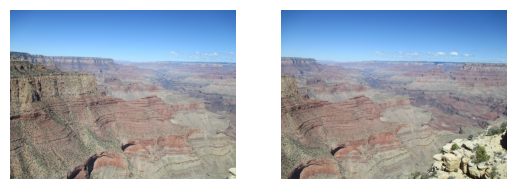

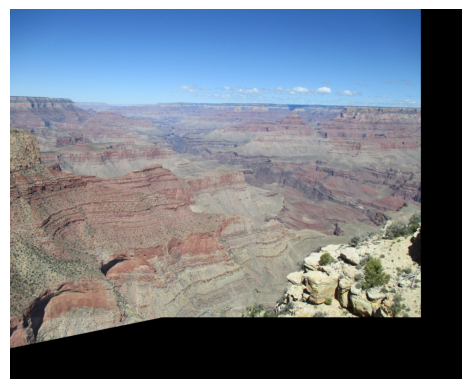

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images to be stitched
img1 = cv2.imread(r'C:\Users\Asus\Documents\Python Codes\Assignments\DIP\FIRST_IMAGE.png')
img2 = cv2.imread(r'C:\Users\Asus\Documents\Python Codes\Assignments\DIP\SECOND_IMAGE.png')

# Convert images to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Create SIFT object and detect keypoints and descriptors
sift = cv2.xfeatures2d.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

# Create BFMatcher object and match descriptors
bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

# Apply ratio test to get good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

# Use RANSAC to estimate transformation matrix
src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

# Warp the images to create panorama
panorama = cv2.warpPerspective(img1, M, (img1.shape[1] + img2.shape[1], img1.shape[0]+img2.shape[0]))
panorama[0:img2.shape[0], 0:img2.shape[1]] = img2


# Display result
fig,axs = plt.subplots(1,2)
axs[0].imshow(img1[:,:,::-1])
axs[0].axis("off")
axs[1].imshow(img2[:,:,::-1])
axs[1].axis("off")
plt.show()
plt.imshow(panorama[:900,:1100,::-1])
plt.axis("off")
plt.show()

# Define Optical Flow Equation? Explain Lucas-Kanade algorithm?

Optical flow is how objects appear to move between frames in a video. The Lucas-Kanade algorithm is a way to estimate optical flow by looking at small areas around points in the image and finding the best match between two consecutive frames. It assumes that the motion is small and the brightness of the image doesn't change much. It's simple and fast, but not as accurate as other methods when there is a lot of motion or changes in brightness.

The Lucas-Kanade algorithm is a method for estimating the motion of objects in a video by analyzing small areas around points in the image. It assumes that the motion is small and that the brightness of the image doesn't change much between consecutive frames. The algorithm finds the best match between the pixel values in the small areas in the current frame and their corresponding locations in the next frame by minimizing the sum of squared differences. It then calculates the motion vector by solving a linear system of equations. The Lucas-Kanade algorithm is simple and fast, but may not work well when there is a lot of motion or changes in brightness.


In [ ]:
import cv2
import numpy as np

def compute_optical_flow(video_path):
    cap = cv2.VideoCapture(video_path)

    # Read the first frame
    ret, prev_frame = cap.read()
    prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)

    # Create an empty mask to draw the optical flow lines
    mask = np.zeros_like(prev_frame)

    while True:
        # Read the next frame
        ret, curr_frame = cap.read()
        if not ret:
            break

        # Convert frames to grayscale
        curr_gray = cv2.cvtColor(curr_frame, cv2.COLOR_BGR2GRAY)

        # Compute optical flow between the frames
        flow = cv2.calcOpticalFlowFarneback(prev_gray, curr_gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)

        # Compute the magnitude and angle of the optical flow vectors
        magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])

        # Set the hue value based on the angle
        mask[..., 0] = angle * 180 / np.pi / 2

        # Set the value based on the magnitude
        mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)

        # Convert HSV to BGR
        flow_rgb = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)

        # Display the optical flow map
        cv2.imshow('Optical Flow', flow_rgb)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

        # Set the current frame as the previous frame for the next iteration
        prev_gray = curr_gray

    # Release the video capture object and close windows
    cap.release()
    cv2.destroyAllWindows()

# Problem -3

# Explain 2D-Wavelet Transform & 2D-Inverse Wavelet Transform?
The 2D-Wavelet Transform is a method of decomposing an image into different frequency subbands. It operates by convolving the image with two sets of filters: a low-pass filter and a high-pass filter. The low-pass filter extracts the coarsest level of approximation coefficients, while the high-pass filter extracts the finest level of detail coefficients. The process is then repeated on the approximation coefficients to obtain further levels of approximation and detail coefficients. The resulting wavelet coefficients can be used for image compression, denoising, and feature extraction.

The 2D-Inverse Wavelet Transform is the reverse process of the 2D-Wavelet Transform. It is used to reconstruct the image from the wavelet coefficients by performing an inverse convolution operation using the same filters in reverse order. The process starts with the highest level of detail coefficients and proceeds to the coarsest level of approximation coefficients. The inverse wavelet transform can be used to reconstruct the image after compression, or to remove noise by thresholding the detail coefficients and reconstructing the image with the remaining coefficients.


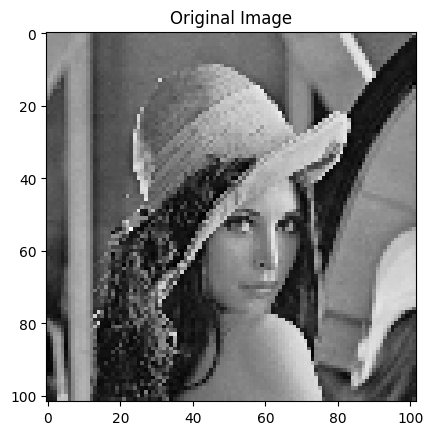

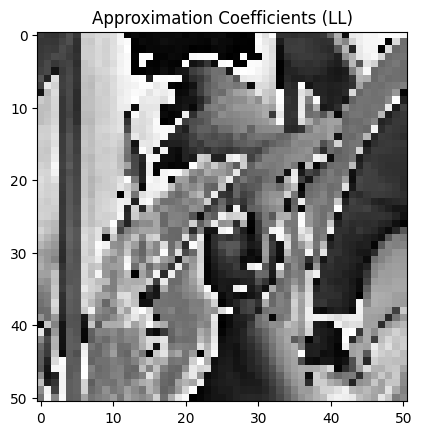

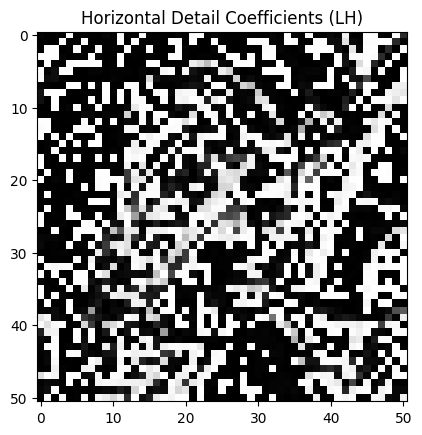

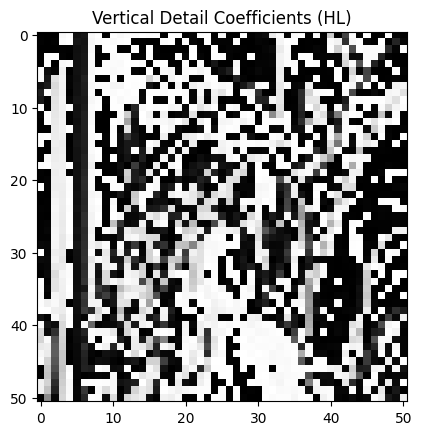

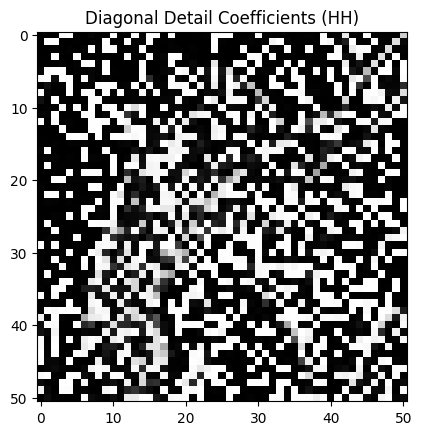

In [28]:
import pywt
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread(r'C:\Users\Asus\Documents\Python Codes\Assignments\DIP\misc\misc\lena.jpg', 0)
img = cv2.resize(img, None, fx=0.2, fy=0.2)
coeffs = pywt.dwt2(img, 'haar')

LL, (LH, HL, HH) = coeffs

plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.show()

plt.imshow(LL.astype(np.uint8), cmap='gray')
plt.title('Approximation Coefficients (LL)')
plt.show()

plt.imshow(LH.astype(np.uint8), cmap='gray')
plt.title('Horizontal Detail Coefficients (LH)')
plt.show()

plt.imshow(HL.astype(np.uint8), cmap='gray')
plt.title('Vertical Detail Coefficients (HL)')
plt.show()

plt.imshow(HH.astype(np.uint8), cmap='gray')
plt.title('Diagonal Detail Coefficients (HH)')
plt.show()